# Data & Computational Libraries

In [1]:
#Data & Computational Libraries
import pandas as pd
import numpy as np
import scipy as sp
import networkx as nx
import statsmodels.formula.api as smf
from scipy import stats
from scipy import optimize as op
from scipy.optimize import leastsq
from scipy.optimize import least_squares
from scipy.optimize import curve_fit

#Visualization Libraries
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['svg.fonttype'] = 'none'

## 50K MC $\lambda$, $\phi$, F ~ U(0,1)

In [2]:
store = pd.HDFStore("Data/uniform_s50K_l2_u30.h5", mode='r')
UMC50K = store.select(key='uniform_s50000_l2_u30',
                 columns=['node_count', 'm', 'true_p', 
                          'flow_destroyed_total', 'flow_import_total', 
                          'Lambda_mean', 'Phi_mean', 
                          'Flow_mean'])
store.close()
UMC50K['epsilon'] = UMC50K['flow_destroyed_total'] / UMC50K['flow_import_total']
UMC50K.drop(axis=1, columns=['flow_destroyed_total', 'flow_import_total'], inplace=True)
display(UMC50K.info(memory_usage='Deep'))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 449500000 entries, 0 to 8989
Data columns (total 7 columns):
node_count     uint16
m              uint32
true_p         float32
Lambda_mean    float32
Phi_mean       float32
Flow_mean      float32
epsilon        float32
dtypes: float32(5), uint16(1), uint32(1)
memory usage: 14.2 GB


None

## 50K MC Fully Connected $\lambda$, $\phi$, F ~ U(0,1)

In [3]:
UMC50Kp1 = pd.read_pickle('Data/uniform_s50K_l2_u5000_p1.pkl', compression='bz2')
UMC50Kp1['epsilon'] = UMC50Kp1['flow_destroyed_total']/UMC50Kp1['flow_import_total']
UMC50Kp1.drop(axis=1, columns=['flow_destroyed_total', 'flow_import_total'], inplace=True)
display(UMC50Kp1.info(memory_usage='Deep'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2908000 entries, 0 to 2907999
Data columns (total 15 columns):
mc_id                uint16
node_count           uint16
m                    uint32
true_p               float32
flow_export_total    float32
import_count         uint32
export_count         uint32
neutral_count        uint32
Lambda_dist          category
Lambda_mean          float32
Phi_dist             category
Phi_mean             float32
Flow_dist            category
Flow_mean            float32
epsilon              float32
dtypes: category(3), float32(6), uint16(2), uint32(4)
memory usage: 130.3 MB


None

## 1M MC Fully Connected Theorem 1

In [4]:
store = pd.HDFStore("Data/theorem1_s1M_l2_u30_p1.h5", mode='r')
MC1Mp1 = store.select(key='table_name',
                 columns=['node_count', 'm', 'true_p', 
                          'flow_destroyed_total', 'flow_import_total', 
                          'Lambda_mean', 'Phi_mean', 
                          'Flow_mean'])
store.close()
MC1Mp1['epsilon'] = MC1Mp1['flow_destroyed_total'] / MC1Mp1['flow_import_total']
MC1Mp1.drop(axis=1, columns=['flow_destroyed_total', 'flow_import_total'], inplace=True)
display(MC1Mp1.info(memory_usage='Deep'))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29000000 entries, 0 to 28
Data columns (total 7 columns):
node_count     int64
m              int64
true_p         float32
Lambda_mean    float64
Phi_mean       float64
Flow_mean      float64
epsilon        float32
dtypes: float32(2), float64(3), int64(2)
memory usage: 1.5 GB


None

## 50K MC Beta shapefactors $\alpha$ and $\beta$

In [5]:
UMC50KBeta = pd.read_csv('Data/beta_nm_uniform_s50K_l2_u30.csv', header=None, names=['a', 'b'], sep=';')
UMC50KBeta['lna']=np.log(UMC50KBeta.a)
UMC50KBeta['lnb']=np.log(UMC50KBeta.b)
temp_n = []
temp_m = []
for n in range(2, 30+1):
    for m in range(1, (n*(n-1))+1):
        temp_n.append(n)
        temp_m.append(m)
        
UMC50KBeta['node_count'] = temp_n
UMC50KBeta['lnn'] = np.log(UMC50KBeta['node_count'])
UMC50KBeta['m'] = temp_m   
display(UMC50KBeta.head())

,a,b,lna,lnb,node_count,lnn,m
0,1.034029,1.006101,0.033463,6.082160e-03,2,0.693147,1
1,1.912156,1.000000,0.648232,2.220446e-16,2,0.693147,2
2,1.051806,1.074469,0.050509,7.182655e-02,3,1.098612,1
3,1.469701,1.046390,0.385059,4.534628e-02,3,1.098612,2
4,1.871861,1.050272,0.626933,4.904902e-02,3,1.098612,3


## Earth's Overshoot Day Records

In [6]:
EOD = pd.read_csv('Data/earth_overshoot_day.csv', header='infer')
display(EOD.head())

,date,year,days_remaining,days_taken
0,"Tuesday, December 29, 1970",1970,3,362
1,"Monday, December 20, 1971",1971,12,353
2,"Saturday, December 9, 1972",1972,23,342
3,"Monday, November 26, 1973",1973,36,329
4,"Wednesday, November 27, 1974",1974,35,330


# Figures

## Figure 1.

In [7]:
def anntt(ax, x1, y1, x2, y2, connectionstyle, pos=(0., 0.), text='test', label=None):

    if label is None:
        label = connectionstyle

#     x1, y1 = 0.3, 0.2
#     x2, y2 = 0.8, 0.6

#     ax.plot([x1, x2], [y1, y2], ".")
    ax.annotate(text,
                xy=(x1, y1), xycoords='data',
                xytext=(x2, y2), textcoords='data',
                arrowprops=dict(arrowstyle="->", #linestyle="dashed",
                                color="0.5",
                                shrinkA=5, shrinkB=5,
                                patchA=None,
                                patchB=None,
                                connectionstyle=connectionstyle,
                                relpos=pos
                                ),
                )

<Figure size 432x288 with 0 Axes>

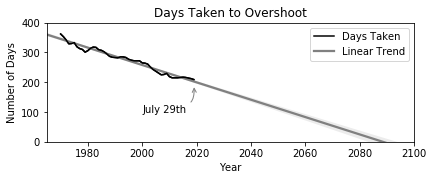

In [8]:
width=6.5748
height=width/3

fig = plt.figure()
# ax = plt.axes(projection='3d')
ax = EOD.plot('year', 'days_taken',
         c='k',
         xlim=(1965,2100),
         ylim=(0,400),
         figsize=(width, height),
         title='Days Taken to Overshoot')

sns.regplot('year', 'days_taken', data=EOD,
           scatter=False,
           ci=95,
           color='grey')

plt.plot(EOD.year, EOD.days_taken,
         c='k')

anntt(ax, 2019, 200, 2000, 100,
     "angle3,angleA=0,angleB=95",
     pos=(1., 1.),
     text='July 29th')

ax.set_xlabel('Year')
ax.set_ylabel('Number of Days')
ax.legend(['Days Taken', 'Linear Trend'])

plt.savefig('Figures/F1.pdf', facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format='pdf',
        transparent=True, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)

## Figure 3.

### Theorem 1 theoretical $\epsilon$

In [9]:
def theorem_epsilon(x, y):
    return (1-x)/(1-(x*y))#np.sin(np.sqrt(x ** 2 + y ** 2))

lambdas = np.linspace(0.01, 0.99, 30)
phis = np.linspace(0.01, 0.99, 30)

L, P = np.meshgrid(lambdas, phis)
E = theorem_epsilon(L, P)

### MC validation of Theorem 1

In [10]:
MC1Mp1_int=MC1Mp1.copy()
MC1Mp1_int.Lambda_mean = np.round(MC1Mp1_int.Lambda_mean, 2)
MC1Mp1_int.Phi_mean = np.round(MC1Mp1_int.Phi_mean, 2)
MC1Mp1_int.epsilon = np.round(MC1Mp1_int.epsilon, 2)
MC1Mp1_int_describe=MC1Mp1_int.groupby(['Lambda_mean', 'Phi_mean'], as_index=False).mean()

LPint=[0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]
MC1Mp1_int_describe=MC1Mp1_int_describe[MC1Mp1_int_describe.Lambda_mean.isin(LPint)]
MC1Mp1_int_describe=MC1Mp1_int_describe[MC1Mp1_int_describe.Phi_mean.isin(LPint)]

### General MC simulation with $\lambda$, $\phi$, and F ~ U(0,1)

In [11]:
UMC50K_int=UMC50K.copy()
UMC50K_int.Lambda_mean = np.round(UMC50K_int.Lambda_mean, 2)
UMC50K_int.Phi_mean = np.round(UMC50K_int.Phi_mean, 2)
UMC50K_int.epsilon = np.round(UMC50K_int.epsilon, 2)
UMC50K_int_describe=UMC50K_int.groupby(['Lambda_mean', 'Phi_mean'], as_index=False).mean()

### Figure 3.

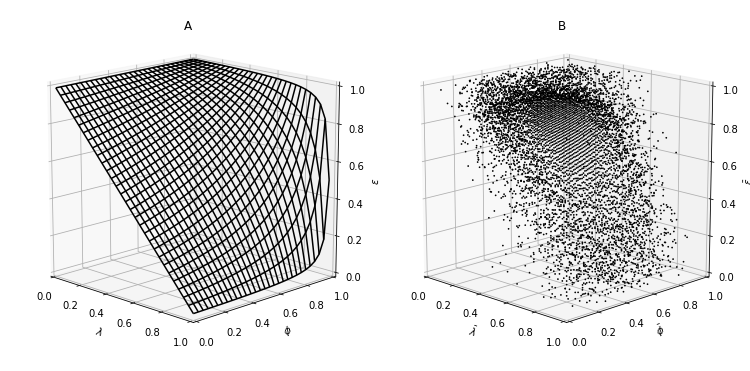

In [51]:
width=6.5748*1.6
height=width/2

fig = plt.figure(figsize=(width,height))
ax=plt.subplot(121, projection='3d')
ax.view_init(15, -45)
ax.plot_wireframe(L, P, E, color='black')
ax.set_title('A')
ax.set_xlabel(r'$\lambda$')
ax.set_ylabel(r'$\phi$')
ax.set_zlabel(r'$\epsilon$')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_zlim(0,1)

ax=plt.subplot(122, projection='3d')
ax.view_init(15, -45)
# ax.plot_wireframe(L, P, E, color='grey', alpha=0.5)
ax.scatter3D(UMC50K_int_describe["Lambda_mean"], 
           UMC50K_int_describe["Phi_mean"], UMC50K_int_describe["epsilon"],
           s=0.5, alpha=1, c='k')
ax.set_title('B')
ax.set_xlabel(r'$\bar{\lambda}$')
ax.set_ylabel(r'$\bar{\phi}$')
ax.set_zlabel(r'$\bar{\epsilon}$')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_zlim(0,1)

fig.tight_layout()
plt.savefig('Figures/F3.pdf', facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format='pdf',
        transparent=True, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)

## Figure 4.

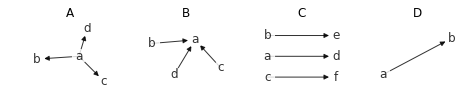

In [31]:
width=6.5748
height=width/4

fig = plt.figure(figsize=(width,height))
ax1=plt.subplot(141)
df = pd.DataFrame({ 'from':['a', 'a', 'a'], 'to':['b', 'c', 'd']})
G=nx.convert_matrix.from_pandas_edgelist(df, 'from', 'to', create_using=nx.DiGraph() )
nx.draw(G, with_labels=True, node_size=200, alpha=0.8, arrows=True, node_color='white')
ax1.set_title('A')
ax.set_aspect('equal')

ax2=plt.subplot(142, sharey=ax1)
df = pd.DataFrame({ 'to':['a', 'a', 'a'], 'from':['b', 'c', 'd']})
G=nx.convert_matrix.from_pandas_edgelist(df, 'from', 'to', create_using=nx.DiGraph() )
nx.draw(G, with_labels=True, node_size=200, alpha=0.8, arrows=True, node_color='white')
ax2.set_title('B')
ax.set_aspect('equal')

ax3=plt.subplot(143, sharey=ax1)
df = pd.DataFrame({ 'from':['a', 'b', 'c'], 'to':['d', 'e', 'f']})
G=nx.convert_matrix.from_pandas_edgelist(df, 'from', 'to', create_using=nx.DiGraph() )
pos = nx.bipartite_layout(G,['a', 'b', 'c'])
nx.draw(G, pos, with_labels=True, node_size=200, alpha=0.8, arrows=True, node_color='white')
ax3.set_title('C')
ax.set_aspect('equal')

ax4=plt.subplot(144, sharey=ax1)
df = pd.DataFrame({ 'from':['a'], 'to':['b']})
G=nx.convert_matrix.from_pandas_edgelist(df, 'from', 'to', create_using=nx.DiGraph() )
nx.draw(G, with_labels=True, node_size=200, alpha=0.8, arrows=True, node_color='white')
ax4.set_title('D')
ax.set_aspect('equal')

plt.tight_layout()
plt.savefig('Figures/F4.pdf', facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format='pdf',
        transparent=True, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)

## Figure 5.

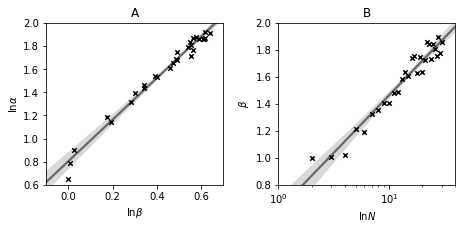

In [14]:
width=6.5748
height=width/2

fig = plt.figure(figsize=(width,height))
ax1=plt.subplot(122)
UMC50KBeta[UMC50KBeta['m']==UMC50KBeta['node_count']*(UMC50KBeta['node_count']-1)].plot(
    'node_count', 'b', logx=True,
    kind='scatter',
    c='k',
    marker='x',
    xlim=(1,40),
    ylim=(0.8,2),
    title='B', ax=ax1)
plot=sns.regplot(x="node_count", y="b", 
                 data=UMC50KBeta[UMC50KBeta['m']==UMC50KBeta['node_count']*(UMC50KBeta['node_count']-1)], fit_reg=True, logx=True,
                 scatter=False,
                 line_kws=({'color':'k', 'alpha':0.51}))
ax1.set_xlabel(r'$\ln{N}$')
ax1.set_ylabel(r'$\beta$')

ax2=plt.subplot(121)
UMC50KBeta[UMC50KBeta['m']==UMC50KBeta['node_count']*(UMC50KBeta['node_count']-1)].plot(
    'lnb', 'lna',
    kind='scatter',
    c='k',
    marker='x',
    xlim=(-0.1,0.7),
    ylim=(0.6,2),
    title='A', ax=ax2)

plot=sns.regplot(x="lnb", y="lna",
                 data=UMC50KBeta[UMC50KBeta['m']==UMC50KBeta['node_count']*(UMC50KBeta['node_count']-1)], fit_reg=True,
                 scatter=False,
                 line_kws=({'color':'k', 'alpha':0.51}))

ax2.set_xlabel(r'$\ln{\beta}$')
ax2.set_ylabel(r'$\ln{\alpha}$')

plt.tight_layout()
plt.savefig('Figures/F5.pdf', facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format='pdf',
        transparent=True, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)

## Figure 6.

### Beta mean and mode approximation

In [32]:
beta_rf = smf.ols(formula='b ~ lnn', data=UMC50KBeta[UMC50KBeta['m']==UMC50KBeta['node_count']*(UMC50KBeta['node_count']-1)]).fit()
bc=(beta_rf.params[0])
bm=(beta_rf.params[1])
beta_rf = smf.ols(formula='lna ~ lnb', data=UMC50KBeta[UMC50KBeta['m']==UMC50KBeta['node_count']*(UMC50KBeta['node_count']-1)]).fit()
ac=(beta_rf.params[0])
am=(beta_rf.params[1])

def beta_mean_epsilon(N):
    bb=(bm*np.log(N))+bc
    aa=(bb**am)*np.exp(ac)
    return (aa/(aa+bb))

def beta_mode_epsilon(N):
    bb=(bm*np.log(N))+bc
    aa=(bb**am)*np.exp(ac)
    return ((aa-1)/(aa+bb-2))

def beta_median_epsilon(N):
    bb=(bm*np.log(N))+bc
    aa=(bb**am)*np.exp(ac)
    return ((aa-(1/3))/(aa+bb-(2/3)))

### MC mode binning

In [33]:
UMC50Kp1['binned_epsilon']=np.round(UMC50Kp1['epsilon'], 2)
UMC50Kp1_mode=UMC50Kp1[['binned_epsilon','node_count']].groupby('node_count', as_index=False).agg(lambda x:x.value_counts().index[0])

### Figure 6.

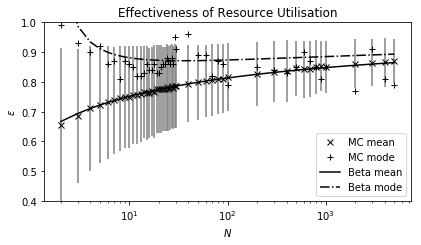

In [34]:
width=6.5748
height=width/2

fig = plt.figure(figsize=(width,height))
ax1=plt.subplot(111)
ax1.plot([x for x in UMC50Kp1.node_count.unique()],
         [UMC50Kp1['epsilon'][UMC50Kp1['node_count']==x].mean() for x in UMC50Kp1.node_count.unique()], 
         'kx', label='MC mean')

ax1.plot([x for x in UMC50Kp1_mode.node_count.unique()],
         [UMC50Kp1_mode['binned_epsilon'][UMC50Kp1_mode['node_count']==x].values for x in UMC50Kp1.node_count.unique()], 
         'k+', label='MC mean')

ax1.errorbar([x for x in UMC50Kp1.node_count.unique()],
         [np.mean(UMC50Kp1['epsilon'][UMC50Kp1['node_count']==x]) for x in UMC50Kp1.node_count.unique()],
         [np.std(UMC50Kp1['epsilon'][UMC50Kp1['node_count']==x]) for x in UMC50Kp1.node_count.unique()], c='grey', fmt='none')

ax1.plot([x for x in range(2,5000)],
         [beta_mean_epsilon(x) for x in range(2,5000)], 
         'k', label='Beta mean')
ax1.plot([x for x in range(2,5000)],
         [beta_mode_epsilon(x) for x in range(2,5000)], 
         'k-.', label='Beta mean')

ax1.set_title('Effectiveness of Resource Utilisation')
ax1.set_ylim(0.4,1)
ax1.set_xscale('log')
ax1.set_xlabel(r"$N$")
ax1.set_ylabel(r"$\epsilon$")
ax1.legend([r'MC mean', r'MC mode',r'Beta mean', r'Beta mode'], loc=4)

plt.savefig('Figures/F6.pdf', facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format='pdf',
        transparent=True, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)

# SI Figures

## Figure SI1.

In [35]:
lambdas = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]#np.linspace(0.01, 0.99, 30)
phis = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]#np.linspace(0.01, 0.99, 30)

L1, P1 = np.meshgrid(lambdas, phis)
E1 = theorem_epsilon(L1, P1)

lambdas = np.linspace(0.01, 0.99, 30)
phis = np.linspace(0.01, 0.99, 30)

L2, P2 = np.meshgrid(lambdas, phis)
E2 = theorem_epsilon(L2, P2)

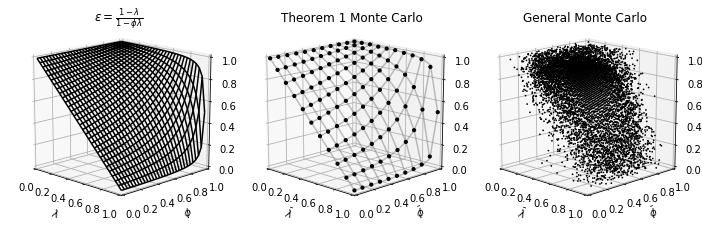

In [36]:
width=6.5748*1.5
height=width/3

fig = plt.figure(figsize=(width,height))
ax=plt.subplot(131, projection='3d')
ax.view_init(15, -45)
ax.plot_wireframe(L2, P2, E2, color='black')
ax.set_title(r'$\epsilon=\frac{1-\lambda}{1-\phi\lambda}$')
ax.set_xlabel(r'$\lambda$')
ax.set_ylabel(r'$\phi$')
ax.set_zlabel(r'$\epsilon$')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_zlim(0,1)

ax=plt.subplot(132, projection='3d')
ax.view_init(15, -45)
ax.plot_wireframe(L1, P1, E1, color='grey', alpha=0.5)
ax.scatter3D(MC1Mp1_int_describe["Lambda_mean"], 
           MC1Mp1_int_describe["Phi_mean"], MC1Mp1_int_describe["epsilon"],
           s=10, alpha=1, c='k')
ax.set_title('Theorem 1 Monte Carlo')
ax.set_xlabel(r'$\bar{\lambda}$')
ax.set_ylabel(r'$\bar{\phi}$')
ax.set_zlabel(r'$\bar{\epsilon}$')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_zlim(0,1)

ax=plt.subplot(133, projection='3d')
ax.view_init(15, -45)
# ax.plot_wireframe(L, P, E, color='grey', alpha=0.5)
ax.scatter3D(UMC50K_int_describe["Lambda_mean"], 
           UMC50K_int_describe["Phi_mean"], UMC50K_int_describe["epsilon"],
           s=0.5, alpha=1, c='k')
ax.set_title('General Monte Carlo')
ax.set_xlabel(r'$\bar{\lambda}$')
ax.set_ylabel(r'$\bar{\phi}$')
ax.set_zlabel(r'$\bar{\epsilon}$')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_zlim(0,1)

fig.tight_layout()
plt.savefig('Figures/FSI1.pdf', facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format='pdf',
        transparent=True, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)

## Figure SI2.

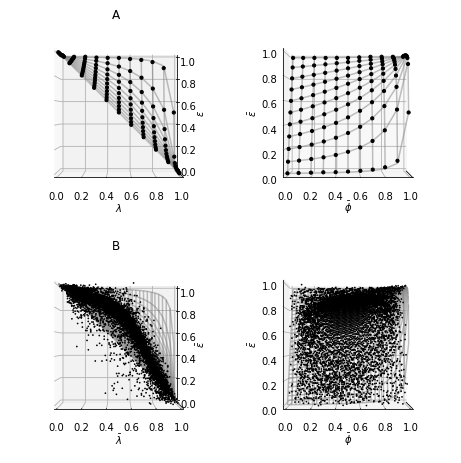

In [37]:
width=6.5748
height=width

fig = plt.figure(figsize=(width,height))
ax=plt.subplot(221, projection='3d')
ax.view_init(0, -90)
ax.plot_wireframe(L1, P1, E1, color='grey', alpha=0.5)
ax.scatter3D(MC1Mp1_int_describe["Lambda_mean"], 
           MC1Mp1_int_describe["Phi_mean"], MC1Mp1_int_describe["epsilon"],
           s=10, alpha=1, c='k')
ax.set_title('A')
ax.set_xlabel(r'$\lambda$')
ax.set_yticks([])
ax.set_zlabel(r'$\epsilon$')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_zlim(0,1)
ax.set_aspect('equal')

ax=plt.subplot(222, projection='3d')
ax.view_init(0, -0)
ax.plot_wireframe(L1, P1, E1, color='grey', alpha=0.5)
ax.scatter3D(MC1Mp1_int_describe["Lambda_mean"], 
           MC1Mp1_int_describe["Phi_mean"], MC1Mp1_int_describe["epsilon"],
           s=10, alpha=1, c='k')
ax.set_xticks([])
ax.set_ylabel(r'$\bar{\phi}$')
ax.set_zlabel(r'$\bar{\epsilon}$')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_zlim(0,1)
ax.set_aspect('equal')

ax=plt.subplot(223, projection='3d')
ax.view_init(0, -90)
ax.plot_wireframe(L2, P2, E2, color='grey', alpha=0.5)
ax.scatter3D(UMC50K_int_describe["Lambda_mean"], 
           UMC50K_int_describe["Phi_mean"], UMC50K_int_describe["epsilon"],
           s=0.5, alpha=1, c='k')
ax.set_title('B')
ax.set_xlabel(r'$\bar{\lambda}$')
ax.set_yticks([])
ax.set_zlabel(r'$\bar{\epsilon}$')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_zlim(0,1)
ax.set_aspect('equal')

ax=plt.subplot(224, projection='3d')
ax.view_init(0, -0)
ax.plot_wireframe(L2, P2, E2, color='grey', alpha=0.5)
ax.scatter3D(UMC50K_int_describe["Lambda_mean"], 
           UMC50K_int_describe["Phi_mean"], UMC50K_int_describe["epsilon"],
           s=0.5, alpha=1, c='k')
ax.set_xticks([])
ax.set_ylabel(r'$\bar{\phi}$')
ax.set_zlabel(r'$\bar{\epsilon}$')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_zlim(0,1)
ax.set_aspect('equal')

fig.tight_layout()
plt.savefig('Figures/FSI2.pdf', facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format='pdf',
        transparent=True, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)

## Figure SI3.

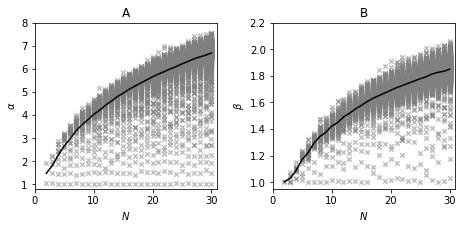

In [38]:
width=6.5748
height=width/2

fig = plt.figure(figsize=(width,height))
ax1=plt.subplot(122)
UMC50KBeta.plot(
    'node_count', 'b',
    kind='scatter',
    c='grey',
    marker='x',
    alpha=0.5,
    xlim=(0,31),
    ylim=(0.95,2.2),
    title='B', ax=ax1)
ax1.plot(UMC50KBeta.node_count.unique(), UMC50KBeta.groupby('node_count').mean().b, 'k', label='Mean')
ax1.set_xlabel(r'$N$')
ax1.set_ylabel(r'$\beta$')

ax2=plt.subplot(121)
UMC50KBeta.plot(
    'node_count', 'a',
    kind='scatter',
    c='grey',
    marker='x',
    alpha=0.5,
    xlim=(0,31),
    ylim=(0.8,8),
    title='A', ax=ax2)
ax2.plot(UMC50KBeta.node_count.unique(), UMC50KBeta.groupby('node_count').mean().a, 'k', label='Mean')
ax2.set_xlabel(r'$N$')
ax2.set_ylabel(r'$\alpha$')

plt.tight_layout()
plt.savefig('Figures/FSI3.pdf', facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format='pdf',
        transparent=True, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)

## Figure SI4.

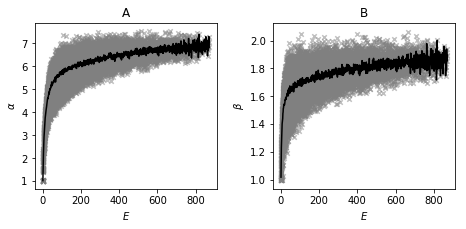

In [39]:
width=6.5748
height=width/2

fig = plt.figure(figsize=(width,height))
ax1=plt.subplot(122)
UMC50KBeta.plot(
    'm', 'b',
    kind='scatter',
    c='grey',
    marker='x',
    alpha=0.5,
#     xlim=(0,31),
#     ylim=(0.95,2.2),
    title='B', ax=ax1)
ax1.plot(UMC50KBeta.m.unique(), UMC50KBeta.groupby('m').mean().b, 'k', label='Mean')
ax1.set_xlabel(r'$E$')
ax1.set_ylabel(r'$\beta$')

ax2=plt.subplot(121)
UMC50KBeta.plot(
    'm', 'a',
    kind='scatter',
    c='grey',
    marker='x',
    alpha=0.5,
#     xlim=(0,31),
#     ylim=(0.8,8),
    title='A', ax=ax2)
ax2.plot(UMC50KBeta.m.unique(), UMC50KBeta.groupby('m').mean().a, 'k', label='Mean')
ax2.set_xlabel(r'$E$')
ax2.set_ylabel(r'$\alpha$')

plt.tight_layout()
plt.savefig('Figures/FSI4.pdf', facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format='pdf',
        transparent=True, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)

## Figure SI5.

In [40]:
def beta_plotter(Z, n,  **kwargs):
    n=(np.max(n.values))
    y=stats.beta.pdf(np.linspace(0, 1, 100), 
                     np.mean(UMC50KBeta[(UMC50KBeta['node_count']==n)&(UMC50KBeta['m']==n*(n-1))]['a']), 
                     np.mean(UMC50KBeta[(UMC50KBeta['node_count']==n)&(UMC50KBeta['m']==n*(n-1))]['b']))
    plt.plot(np.linspace(0, 1, 100), y, 'k-', lw=2)

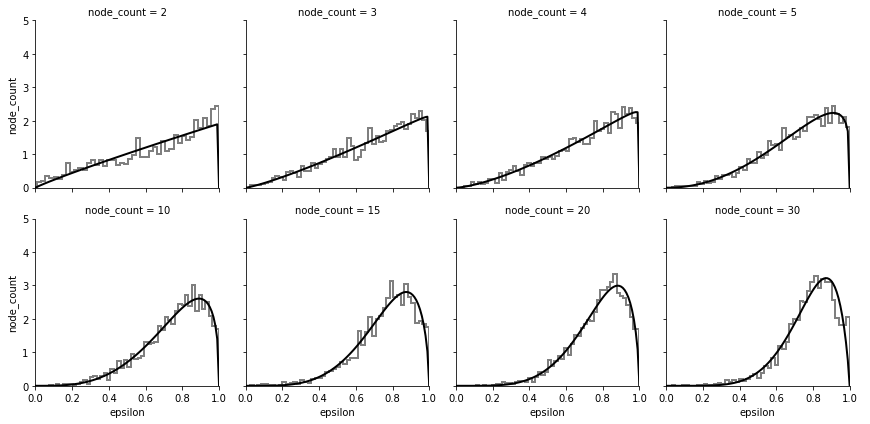

In [41]:
g = sns.FacetGrid(UMC50K[(UMC50K.true_p==1)&((UMC50K.node_count<=5)|(UMC50K.node_count==10)|(UMC50K.node_count==15)|(UMC50K.node_count==20)|(UMC50K.node_count==30))],
                  col='node_count', col_wrap=4)
g = (g.map(sns.distplot, "epsilon",
           hist_kws={"histtype": "step", "density":"True", "facecolor":"black", "linewidth": 2,
                     "alpha": 0.5, "edgecolor": "k"},
#            **dict(kde=False, fit=stats.beta), fit_kws={"linewidth": 2,
#                      "alpha": 1, "color": "purple"})
           **dict(kde=False))
      .add_legend()
     .set(xlim=(-0,1), ylim=(0,5), xlabel=(r'$\epsilon$')))

g=g.map(beta_plotter, 'epsilon', 'node_count')

plt.tight_layout()
plt.savefig('Figures/FSI5.pdf', facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format='pdf',
        transparent=True, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)

## Figure SI6.

In [42]:
def beta_plotter(Z, n,  **kwargs):
    n=(np.max(n.values))
    y=stats.beta.pdf(np.linspace(0, 1, 100), 
                     np.mean(UMC50KBeta[(UMC50KBeta['node_count']==n)]['a']), 
                     np.mean(UMC50KBeta[(UMC50KBeta['node_count']==n)]['b']))
    plt.plot(np.linspace(0, 1, 100), y, 'k-', lw=2)

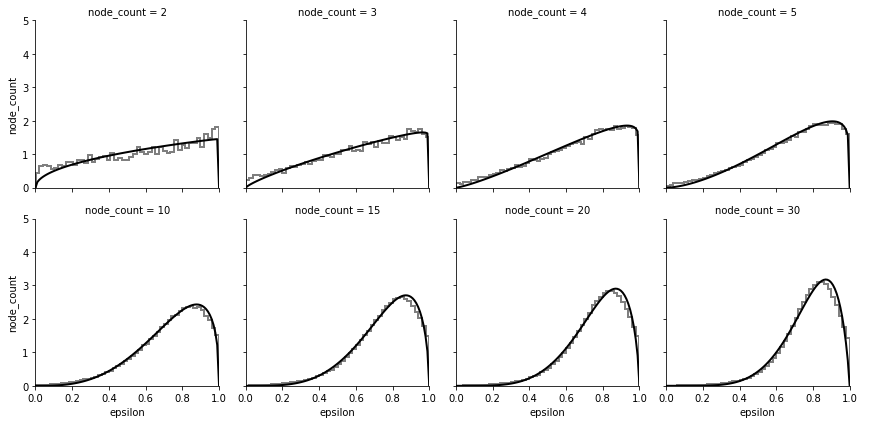

In [43]:
g = sns.FacetGrid(UMC50K[((UMC50K.node_count<=5)|(UMC50K.node_count==10)|(UMC50K.node_count==15)|(UMC50K.node_count==20)|(UMC50K.node_count==30))],
                  col='node_count', col_wrap=4)
g = (g.map(sns.distplot, "epsilon",
           hist_kws={"histtype": "step", "density":"True", "facecolor":"black", "linewidth": 2,
                     "alpha": 0.5, "edgecolor": "k"},
           **dict(kde=False))
      .add_legend()
     .set(xlim=(-0,1), ylim=(0,5), xlabel=(r'$\epsilon$')))

g=g.map(beta_plotter, 'epsilon', 'node_count')

plt.tight_layout()
plt.savefig('Figures/FSI6.pdf', facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format='pdf',
        transparent=True, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)

## Figure SI7.

In [44]:
def beta_plotter(Z, n,  **kwargs):
    m=(np.max(n.values))
    y=stats.beta.pdf(np.linspace(0, 1, 100), 
                     np.mean(UMC50KBeta[(UMC50KBeta['m']==m)]['a']),#&(UMC50KBeta['node_count']==(1+((1+4*m)**0.5))/2)]['a']), 
                     np.mean(UMC50KBeta[(UMC50KBeta['m']==m)]['b']))#&(UMC50KBeta['node_count']==(1+((1+4*m)**0.5))/2)]['b']))
    plt.plot(np.linspace(0, 1, 100), y, 'k-', lw=2)

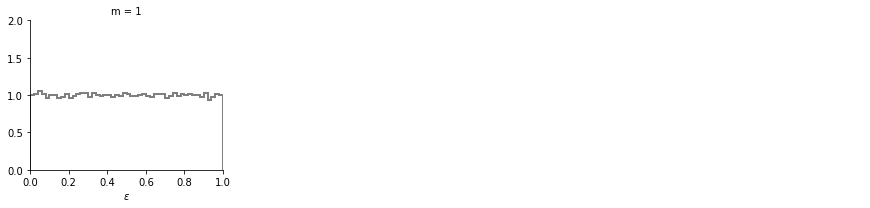

In [45]:
g = sns.FacetGrid(UMC50K[(UMC50K.m==1)],
                  col='m', col_wrap=4)
g = (g.map(sns.distplot, "epsilon",
           hist_kws={"histtype": "step", "density":"True", "facecolor":"k", "linewidth": 2,
                     "alpha": 0.5, "edgecolor": "k"},
           **dict(kde=False))
      .add_legend()
     .set(xlim=(-0,1), ylim=(0,2), xlabel=(r'$\epsilon$')))

plt.tight_layout()
plt.savefig('Figures/FSI#.pdf', facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format='pdf',
        transparent=True, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)

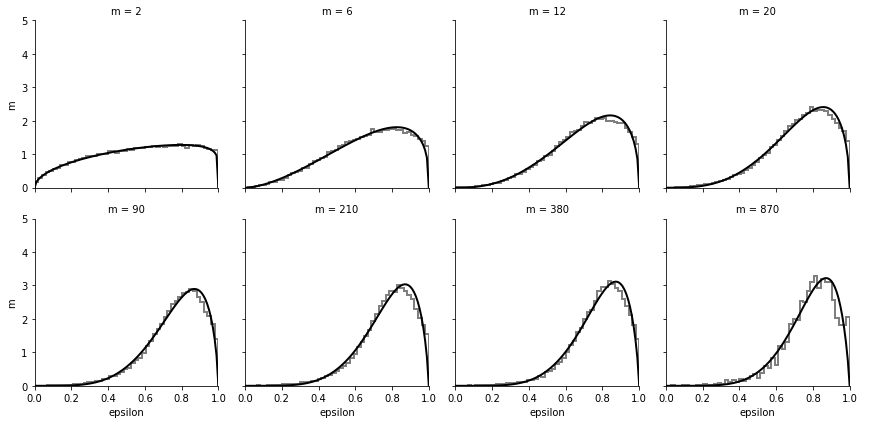

In [46]:
g = sns.FacetGrid(UMC50K[((UMC50K.m==2)|(UMC50K.m==6)|(UMC50K.m==12)|(UMC50K.m==20)|(UMC50K.m==90)|(UMC50K.m==210)|(UMC50K.m==380)|(UMC50K.m==870))],
                  col='m', col_wrap=4)
g = (g.map(sns.distplot, "epsilon",
           hist_kws={"histtype": "step", "density":"True", "facecolor":"k", "linewidth": 2,
                     "alpha": 0.5, "edgecolor": "k"},
           **dict(kde=False))
      .add_legend()
     .set(xlim=(-0,1), ylim=(0,5), xlabel=(r'$\epsilon$')))

g=g.map(beta_plotter, 'epsilon', 'm')

plt.tight_layout()
plt.savefig('Figures/FSI7.pdf', facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format='pdf',
        transparent=True, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)